In [32]:
%matplotlib inline
%env CUDA_VISIBLE_DEVICES = 1

env: CUDA_VISIBLE_DEVICES=1


In [71]:
%run mylibrary.ipynb

env: CUDA_VISIBLE_DEVICES=1


In [56]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import math
import random

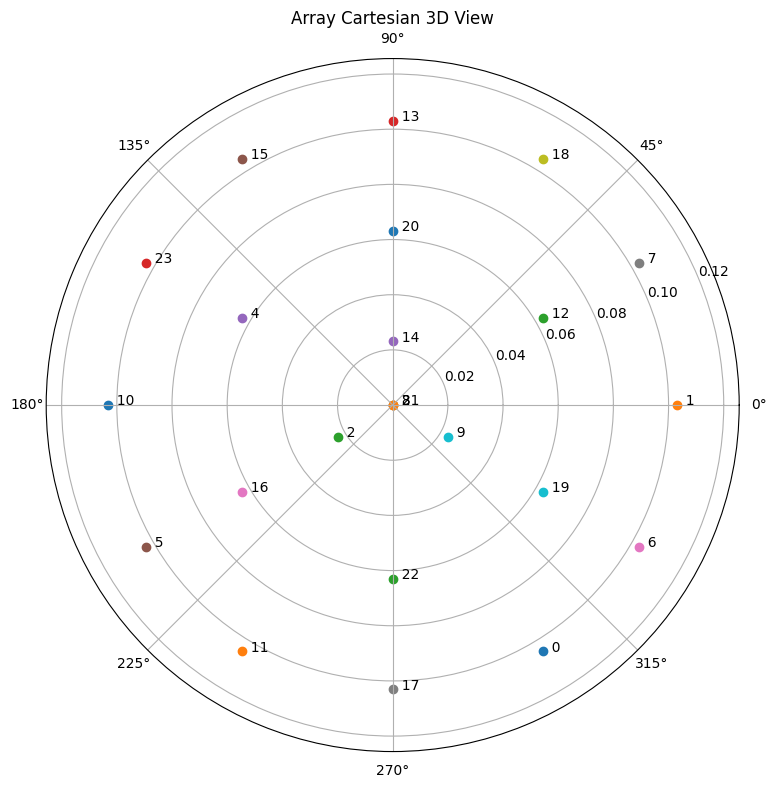

In [57]:
geometry = pd.read_csv('../AA_geometry.tsv', header=None, sep='\t')
AA_Geometry = geometry.to_numpy()
visualizer = Visualizer(AA_Geometry)
visualizer.polar(fig_size=(10,9),save_dir = 'plot/')

In [58]:
class MyModel(tf.keras.Model):
    # Todo
    # Include: batch normalization
    def __init__(self, n_channels, activation = 'relu'):
        super().__init__()
        self.net = tf.keras.Sequential([
            tf.keras.layers.Input(n_channels),
            tf.keras.layers.Dense(units=16, activation=activation),
            tf.keras.layers.Dense(units=8, activation=activation),
            tf.keras.layers.Dense(units=1, activation = 'linear')
        ])

    def call(self, inputs):
        return self.net(inputs)

In [62]:
# Extract data from files
data = DataExtract("../data/rss360/", 24)
inputs = data.get_delays()
labels = data.get_angles()

['random_signal_source_info_0.dat', 'random_signal_source_info_1.dat', 'random_signal_source_info_2.dat', 'random_signal_source_info_3.dat', 'random_signal_source_info_4.dat', 'random_signal_source_info_5.dat', 'random_signal_source_info_6.dat', 'random_signal_source_info_7.dat', 'random_signal_source_info_8.dat', 'random_signal_source_info_9.dat', 'random_signal_source_info_10.dat', 'random_signal_source_info_11.dat', 'random_signal_source_info_12.dat', 'random_signal_source_info_13.dat', 'random_signal_source_info_14.dat', 'random_signal_source_info_15.dat', 'random_signal_source_info_16.dat', 'random_signal_source_info_17.dat', 'random_signal_source_info_18.dat', 'random_signal_source_info_19.dat']
['random_signal_source_info_0_tau.bin', 'random_signal_source_info_1_tau.bin', 'random_signal_source_info_2_tau.bin', 'random_signal_source_info_3_tau.bin', 'random_signal_source_info_4_tau.bin', 'random_signal_source_info_5_tau.bin', 'random_signal_source_info_6_tau.bin', 'random_signal_

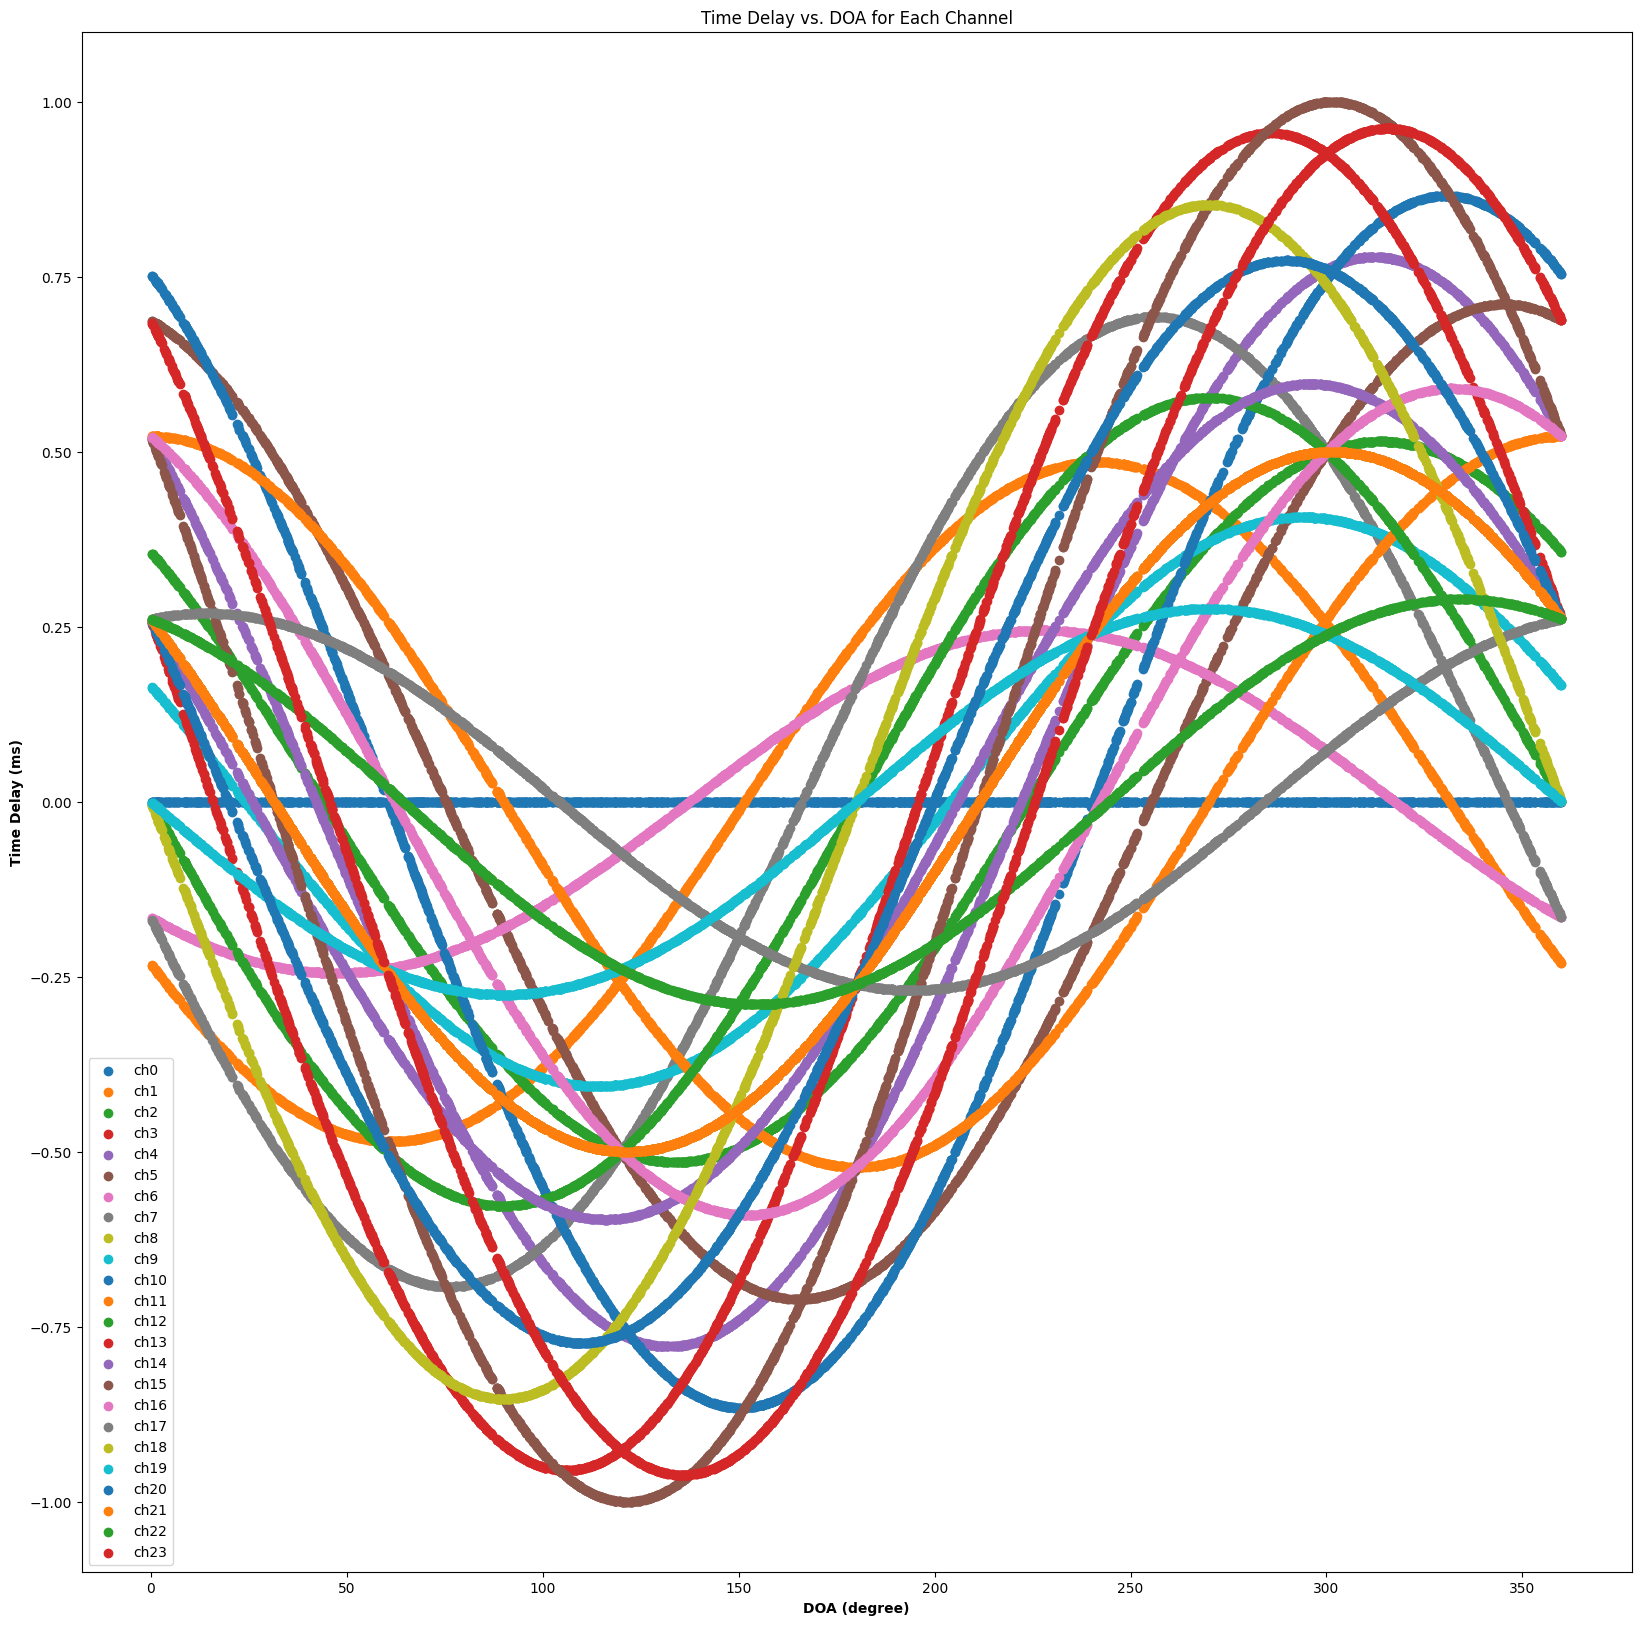

In [63]:
# All 24 channels
dataset = DataSetPacker(inputs, labels)
dataset.plot()

In [73]:
# random list of n channels
list_channels_4 = genRandomAA(4,1)
list_channels_8 = genRandomAA(8,20)
list_channels_16 = genRandomAA(16,20)

In [ ]:
n_channels = list(range(3,25,3))
master_df = pd.DataFrame()
for ch in n_channels:
    list_channels = genRandomAA(ch, 20)
    # train and evaluate models and put into a pandas table
    models, evaluates, losses = training_evaluation("relu",list_channels, inputs, labels)
    # if master df is empty
    df = evaluates_table("relu",list_channels, evaluates)
    if master_df.empty:
        master_df = df
    else:
        master_df = pd.concat([master_df, df], ignore_index=True)
master_df.to_csv("plot/models_evaluation.csv")
master_df
        


/tmp/ipykernel_57/1206615526.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt .subplots(ncols = 3, nrows=1, figsize=(12,3), layout="constrained")
2025-03-19 21:10:55.929543: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [106]:
master_df['Channels']

array([ 3, 23, 12])

,Activation,Channels,Loss,Mae,Mse
0,relu,"[18, 16, 13, 5]",2199.589111,2199.589111,25.967913


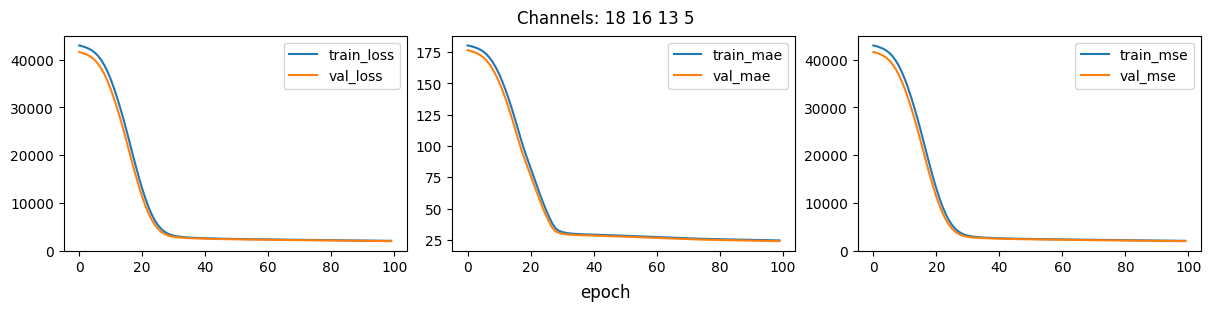

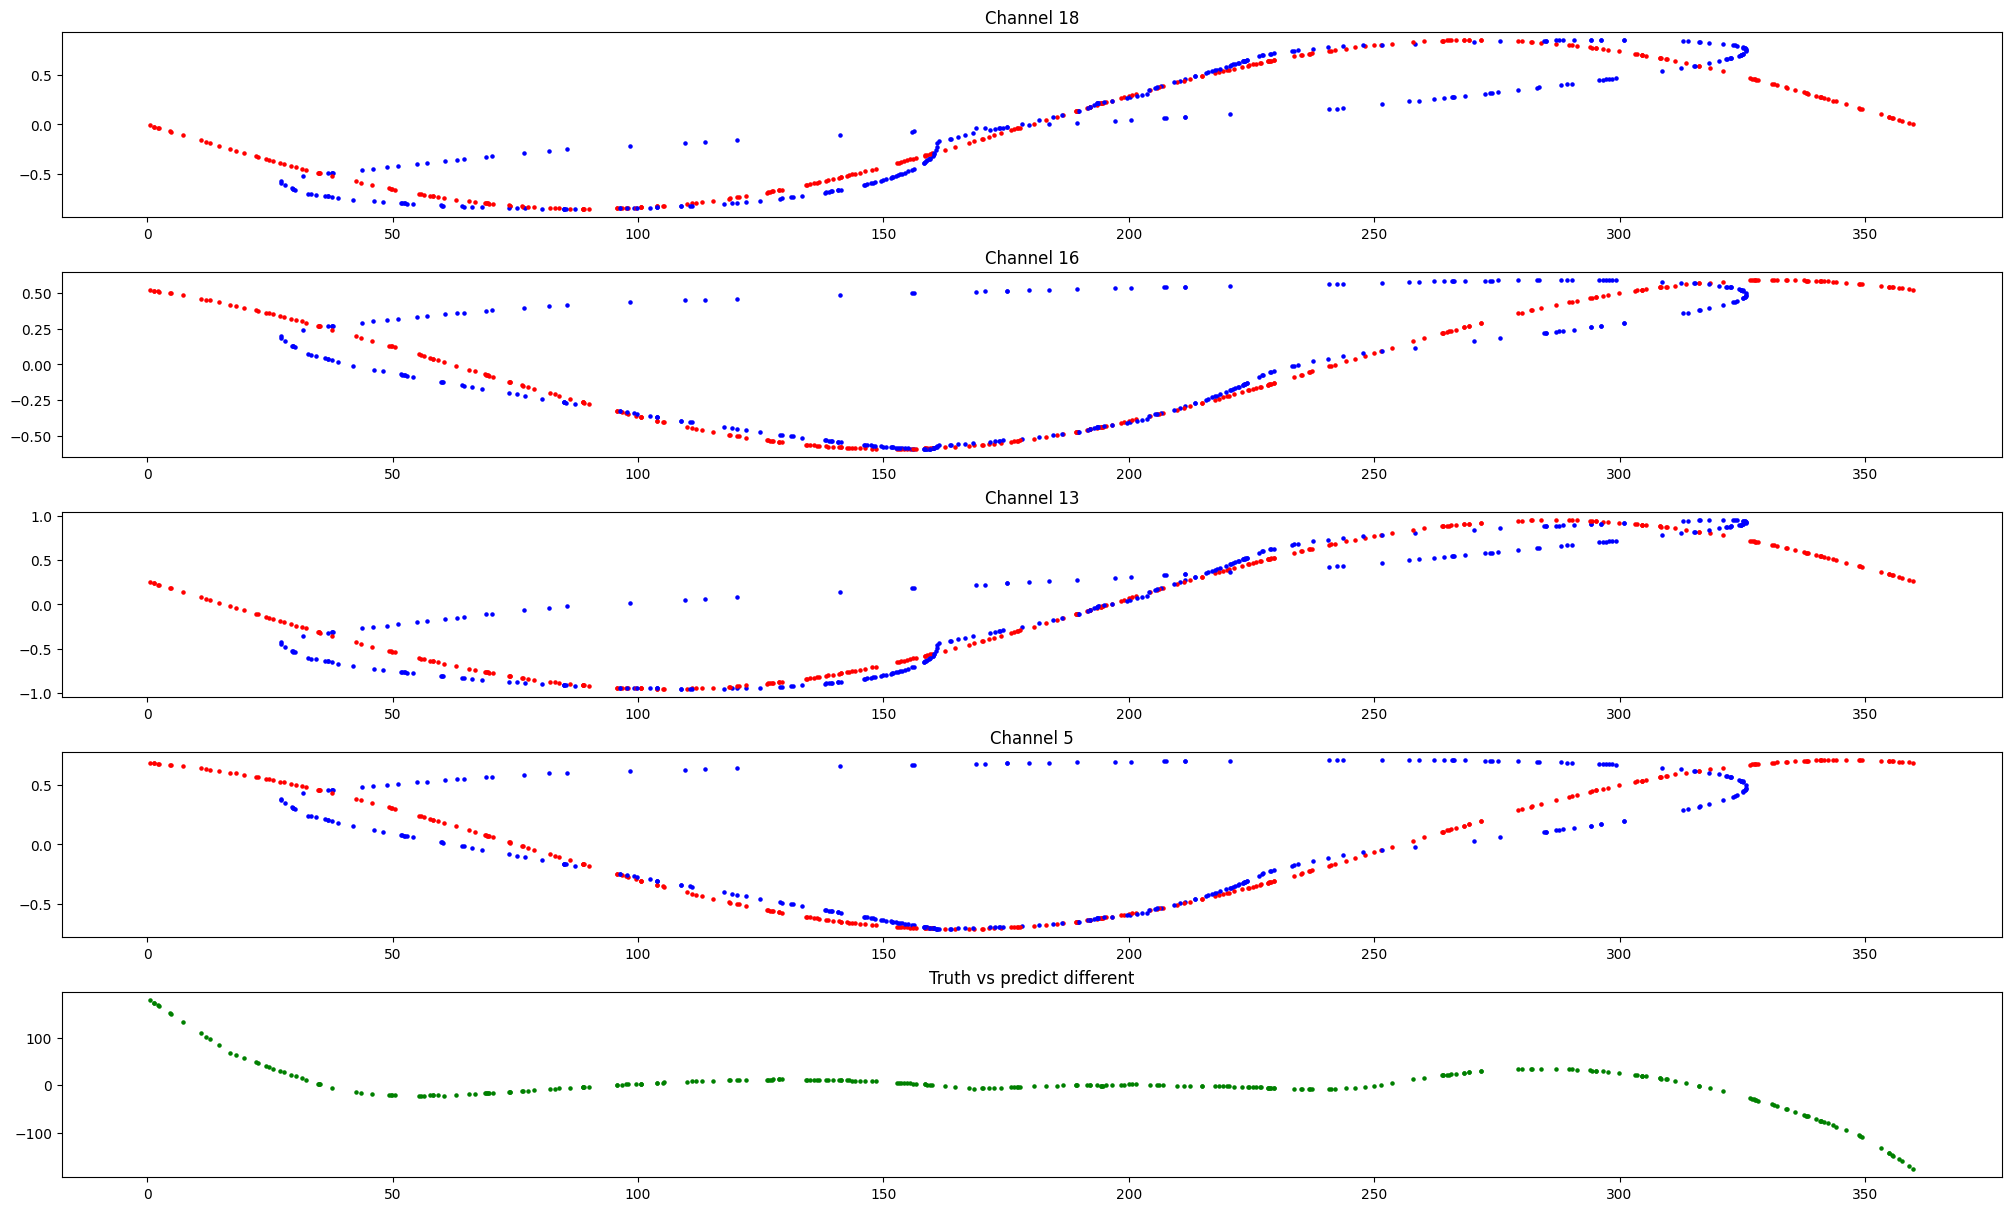

In [82]:
# train and evaluate models and put into a pandas table
models_4, evaluates_4, losses_4 = training_evaluation("relu",list_channels_4, inputs, labels)
df_4 = evaluates_table("relu",list_channels_4, evaluates_4)
df_4

In [87]:
# merge all evaluation
df = pd.concat([df_4,df_8, df_16], ignore_index=True)
df.to_csv("plot/models_evaluation.csv")
df

NameError: name 'df_8' is not defined

In [833]:
for i in range(len(df)):
    if df.loc[i].Mse < 0.1:
        print(i, df.loc[i].Channels, df.loc[i].Mse)

3 [ 1 13 22 10] 0.07233411073684692
4 [ 7  5 19 15] 0.09613901376724243
8 [ 5 20 22  4] 0.0898098424077034
16 [ 6  3 15 22] 0.07379598915576935
23 [22 20 12 14 16  6  4 23] 0.06768228858709335
24 [ 1 12 20 14  4 16 10 18] 0.06733084470033646


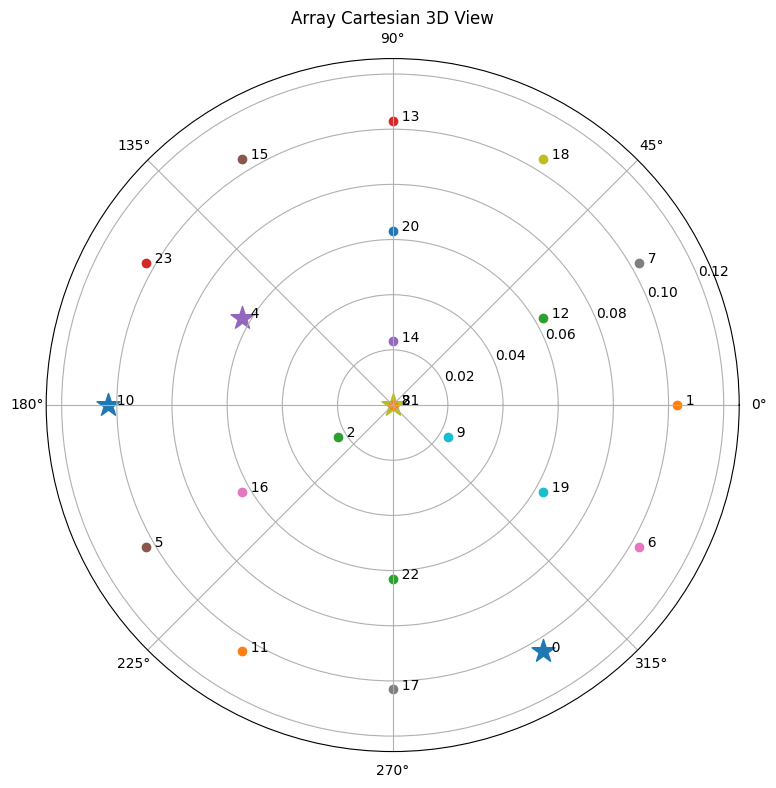

In [857]:
visualizer.polar(channels= df.loc[0].Channels, fig_size=(10,9))

In [841]:
# All channels
channel_id = [list(range(0,24))]
model, evaluate, losses = training_evaluation("relu",channel_id, inputs, labels)

KeyboardInterrupt: 

In [ ]:
x = test_dataset.take(1)

i, label=list(x.as_numpy_iterator())[0][0], list(x.as_numpy_iterator())[0][1]

i = i.reshape(-1,4)

model.predict(i), label

model.evaluate(test_dataset.batch(100))